In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
DATA_DIR = './data'
files = [f for f in listdir(DATA_DIR) if isfile(join(DATA_DIR, f))]

dfOriginal = pd.DataFrame()
for f in files:
    file = pd.read_csv(join(DATA_DIR, f),  skip_blank_lines=True)
    file['University'] = f.split('.csv')[0]
    try:
        dfOriginal = dfOriginal.append(file, ignore_index=True)
    except IndexError:
        dfOriginal = file

dfOriginal = dfOriginal.dropna()

In [3]:
geo = pd.read_csv('./geo.csv', sep=';', skip_blank_lines=True).dropna()

geo = geo.rename(columns={
    "Moscow Institute of Physics and Technology": "МФТИ",
    "Novosibirsk State University": "НГУ",
    "St. Petersburg State University": "СПбГУ",
    "Tomsk Polytechnic University": "ТПУ",
    "I.M. Gubkin Russian State University of Oil and Gas": "РГУ",
    "Peter the Great St. Petersburg Polytechnic University": "СПбПУ",
    "St. Petersburg National Research University of Information Technologies, Mechanics and Optics (ITMO)": "ИТМО",
    "Tyumen State University": "ТюмГУ",
    "Tyumen State Oil and Gas University": "ТИУ",
    "Ufa State Petroleum Technological University": "УГНТУ",
    "Skolkovo Institute of Science and Technology": "Сколково"
})
geo.columns

Index(['Topic', 'Topic Number', 'МФТИ', 'НГУ', 'СПбГУ', 'ТПУ', 'РГУ', 'СПбПУ',
       'ИТМО', 'ТюмГУ', 'ТИУ', 'УГНТУ', 'Сколково'],
      dtype='object')

In [4]:
geo['Topic'] = geo['Topic'].apply(lambda t: t.replace('; ', ','))

In [5]:
#geoTopics = np.array([t.replace('; ', ',') for t in np.array(geo['Topic'])[:-1]])

In [6]:
dfGeo = dfOriginal[dfOriginal['Topic name'].isin(np.array(geo['Topic']))].reset_index()

In [7]:
def findCell(x):
    row = geo[geo['Topic'] == x['Topic name']]
    if x['University'] in row:
        return row[x['University']].iloc[0]
    return 0

dfGeo['score'] = dfGeo.apply(findCell, axis=1)

In [8]:
dfGeo[dfGeo['score'] > 0]

,index,Title,Authors,Number of Authors,Scopus Author Ids,Year,Scopus Source title,Field-Weighted View Impact,Views,Citations,...,All Science Journal Classification (ASJC) code,All Science Journal Classification (ASJC) field name,Topic Cluster name,Topic Cluster number,Topic name,Topic number,Topic Cluster Prominence Percentile,Topic Prominence Percentile,University,score
269,22750,Nonlinear filtering for map-aided navigation. ...,"Stepanov, O.A.| Toropov, A.B.",2,56269618300| 37014144500,2015,Gyroscopy and Navigation,1.92,46,29,...,1700| 2207| 2208,General Computer Science| Control and Systems ...,"GRACE,Gravitation,Geodetic Satellites",797,"Gravity Gradiometers,Strapdown Inertial Naviga...",26910,51.874,74.474,ИТМО,0.164230
270,22901,Nonlinear filtering for map-aided navigation P...,"Stepanov, O.A.| Toropov, A.B.",2,56269618300| 37014144500,2016,Gyroscopy and Navigation,1.72,33,24,...,1700| 2207| 2208,General Computer Science| Control and Systems ...,"GRACE,Gravitation,Geodetic Satellites",797,"Gravity Gradiometers,Strapdown Inertial Naviga...",26910,51.874,74.474,ИТМО,0.164230
271,23513,Comparative Energy Modeling of Multiwalled Mg3...,"Krasilin, A.A.| Nevedomsky, V.N.| Gusarov, V.V.",3,53164175300| 25031682400| 7005239891,2017,Journal of Physical Chemistry C,1.46,37,15,...,1606| 2100| 2504| 2508,Physical and Theoretical Chemistry| General En...,"Kaolinite,Clay Minerals,Nanotubes",815,"Serpentine Asbestos,Cronstedtite,Lizardite",20795,64.993,73.02,ИТМО,0.046205
272,23592,A modern software system of a mobile Chekan-AM...,"Krasnov, A.A.| Sokolov, A.V.",2,46761231500| 56178447300,2015,Gyroscopy and Navigation,0.82,16,14,...,1700| 2207| 2208,General Computer Science| Control and Systems ...,"GRACE,Gravitation,Geodetic Satellites",797,"Gravity Gradiometers,Strapdown Inertial Naviga...",26910,51.874,74.474,ИТМО,0.164230
273,23814,A new air-sea gravimeter: Development and test...,"Peshekhonov, V.G.| Sokolov, A.V.| Elinson, L.S...",4,57191853945| 56178447300| 46761134400| 4676123...,2015,22nd Saint Petersburg International Conference...,3.36,31,12,...,1705| 1710| 1711| 2208,Computer Networks and Communications| Informat...,"GRACE,Gravitation,Geodetic Satellites",797,"Gravity Gradiometers,Strapdown Inertial Naviga...",26910,51.874,74.474,ИТМО,0.164230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,274091,On the possibility of inversion in borehole se...,"Lensky, V.A.| Zhuzhel, A.S.| Umetbaev, W.G.",3,56632193800| 57204009728| 57210207641,2019,Neftyanoe Khozyaystvo - Oil Industry,0.52,11,0,...,2102| 2103,Energy Engineering and Power Technology| Fuel ...,"Seismic Waves,Seismology,Seismic Data",371,"Isotropic Media,P Wave,Azimuth",2560,59.438,87.548,УГНТУ,0.001928
6600,274105,On the use of geophysical research data aiming...,"Mukhametshin, V.V.| Kuleshova, L.S.",2,57203543434| 49963947200,2020,IOP Conference Series: Materials Science and E...,0.20,1,0,...,2200| 2500,General Engineering| General Materials Science,"Liquefied Natural Gas,Gases,Liquefaction",1460,"Oil Recovery,Oil Well Flooding,Horizontal Wells",91864,21.821,80.108,УГНТУ,0.633075
6601,274110,Atomic-absorption determination of weight conc...,"Gilyazeva, L.R.| Murinov, K.Yu.| Sultanov, Sh.Kh.",3,57200554927| 56615308400| 23111853300,2018,Neftyanoe Khozyaystvo - Oil Industry,0.74,17,0,...,2102| 2103,Energy Engineering and Power Technology| Fuel ...,"Aquifers,Groundwater Resources,Groundwater Flow",282,"Hydraulic Head,Groundwater Flow,Stagnation Point",38409,77.778,69.766,УГНТУ,0.004950
6602,274123,Allocation of facies zones in deposits of the ...,"Aleksandrov, V.M.| Ponomarev, A.A.| Gaysin, E....",6,57191835860| 57191844441| 57200568068| 5719548...,2017,Journal of Industrial Pollution Control,1.46,35,0,...,1507| 1902| 2212| 2310| 2312,Fluid Flow and Transfer Processes| Atmospheric...,"Hydrocarbons,Deposits,Basin",1407,"Western Siberia,Catagenesis,Jurassic",38138,12.784,79.418,УГНТУ,0.011363


In [9]:
df=dfGeo

In [10]:
dfGeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6851 entries, 0 to 6850
Data columns (total 32 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   index                                                               6851 non-null   int64  
 1   Title                                                               6851 non-null   object 
 2   Authors                                                             6851 non-null   object 
 3   Number of Authors                                                   6851 non-null   int64  
 4   Scopus Author Ids                                                   6851 non-null   object 
 5   Year                                                                6851 non-null   int64  
 6   Scopus Source title                                                 6851 non-null   object 
 7   Field-Weighted 

In [11]:
df.shape

(6851, 32)

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.isnull().sum()

index                                                                 0
Title                                                                 0
Authors                                                               0
Number of Authors                                                     0
Scopus Author Ids                                                     0
Year                                                                  0
Scopus Source title                                                   0
Field-Weighted View Impact                                            0
Views                                                                 0
Citations                                                             0
Field-Weighted Citation Impact                                        0
Outputs in Top Citation Percentiles, per percentile                   0
Field-Weighted Outputs in Top Citation Percentiles, per percentile    0
Reference                                                       

In [14]:
df['Publication type'].unique()

array(['Article', 'Conference Paper', 'Review', 'Chapter', 'Letter',
       'Editorial', 'Book', 'Note', 'Abstract Report', 'Data Paper',
       'Short Survey', 'Article in Press'], dtype=object)

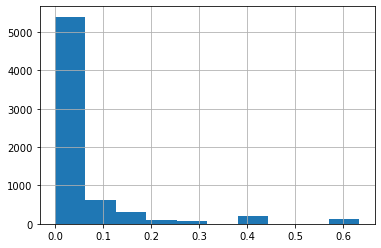

In [15]:
df.score.hist();

In [16]:
new_data=df.drop(['Title', 'Authors', 'Scopus Author Ids', 'Scopus Source title', 'Reference', 'Abstract', 'DOI', 'EID', 'Scopus Affiliation IDs', 'Scopus Affiliation names', 'Country/Region', 'All Science Journal Classification (ASJC) code', 'All Science Journal Classification (ASJC) field name', 'Topic Cluster name', 'Topic Cluster number', 'Topic name', 'Topic number', 'University',  'Outputs in Top Citation Percentiles, per percentile', 'Institutions'], axis = 1)

In [17]:
new_data.head()

,index,Number of Authors,Year,Field-Weighted View Impact,Views,Citations,Field-Weighted Citation Impact,"Field-Weighted Outputs in Top Citation Percentiles, per percentile",Publication type,Topic Cluster Prominence Percentile,Topic Prominence Percentile,score
0,96,5,2018,1.55,26,11,1.76,16,Article,96.519,79.242,0.0
1,134,2,2018,1.59,28,8,1.37,22,Article,69.545,87.089,0.0
2,466,2,2017,0.70,15,3,0.43,51,Article,80.79,12.148,0.0
3,575,2,2019,1.59,32,2,0.51,44,Article,69.545,87.089,0.0
4,615,4,2017,0.93,20,2,0.29,59,Article,69.545,87.089,0.0


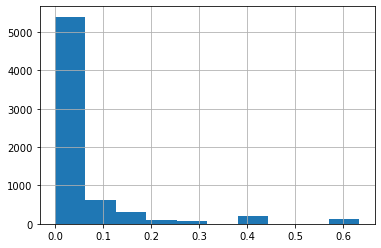

In [18]:
new_data.score.hist()

In [19]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6851 entries, 0 to 6850
Data columns (total 12 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   index                                                               6851 non-null   int64  
 1   Number of Authors                                                   6851 non-null   int64  
 2   Year                                                                6851 non-null   int64  
 3   Field-Weighted View Impact                                          6851 non-null   float64
 4   Views                                                               6851 non-null   int64  
 5   Citations                                                           6851 non-null   int64  
 6   Field-Weighted Citation Impact                                      6851 non-null   float64
 7   Field-Weighted 

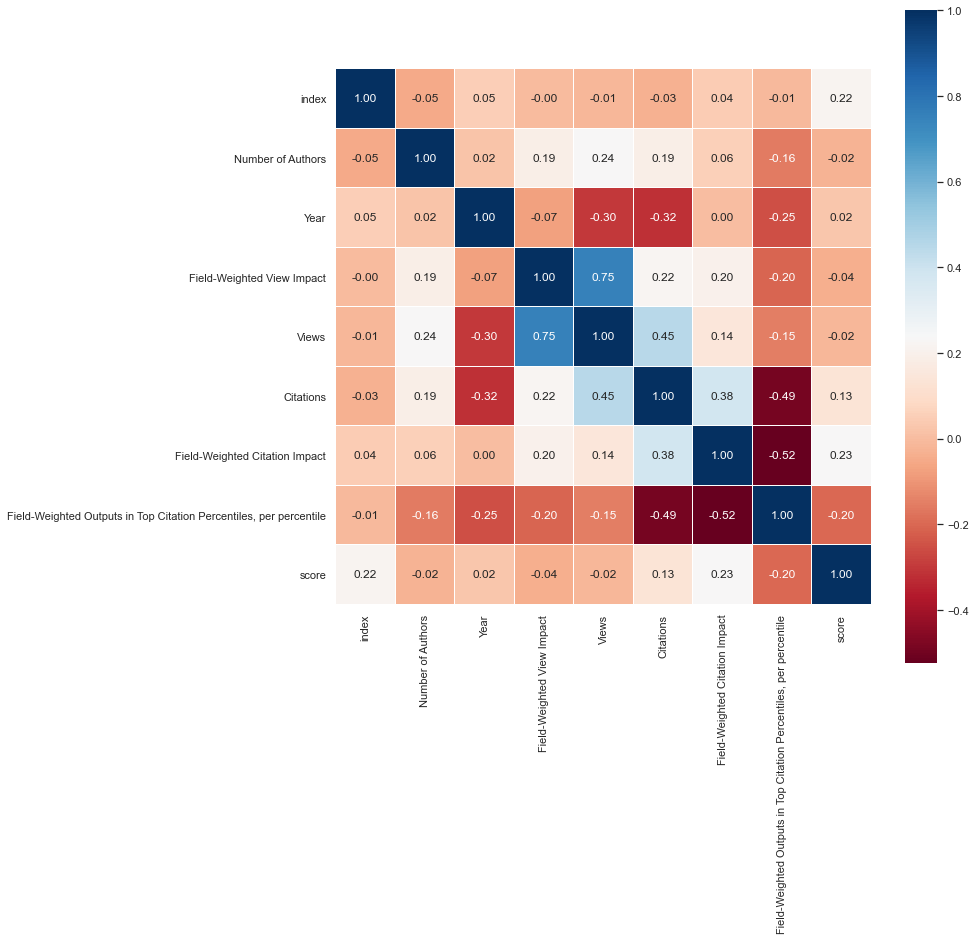

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(new_data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

In [21]:
# Сделаем из Publication type dummie
new_data_oh = pd.get_dummies(new_data, columns = ['Publication type', 'Year'])
new_data_oh

,index,Number of Authors,Field-Weighted View Impact,Views,Citations,Field-Weighted Citation Impact,"Field-Weighted Outputs in Top Citation Percentiles, per percentile",Topic Cluster Prominence Percentile,Topic Prominence Percentile,score,...,Publication type_Letter,Publication type_Note,Publication type_Review,Publication type_Short Survey,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
0,96,5,1.55,26,11,1.76,16,96.519,79.242,0.0,...,0,0,0,0,0,0,0,1,0,0
1,134,2,1.59,28,8,1.37,22,69.545,87.089,0.0,...,0,0,0,0,0,0,0,1,0,0
2,466,2,0.70,15,3,0.43,51,80.79,12.148,0.0,...,0,0,0,0,0,0,1,0,0,0
3,575,2,1.59,32,2,0.51,44,69.545,87.089,0.0,...,0,0,0,0,0,0,0,0,1,0
4,615,4,0.93,20,2,0.29,59,69.545,87.089,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,297143,3,1.74,13,0,0.00,60,87.282,95.508,0.0,...,0,0,0,0,0,0,0,0,1,0
6847,297154,4,0.25,3,0,0.00,60,87.282,81.036,0.0,...,0,0,0,0,0,0,0,0,1,0
6848,297208,6,1.75,23,0,0.00,60,12.784,89.816,0.0,...,0,0,0,0,0,0,0,0,1,0
6849,297252,1,1.65,17,0,0.00,32,85.877,79.368,0.0,...,0,0,0,0,0,0,0,0,0,1


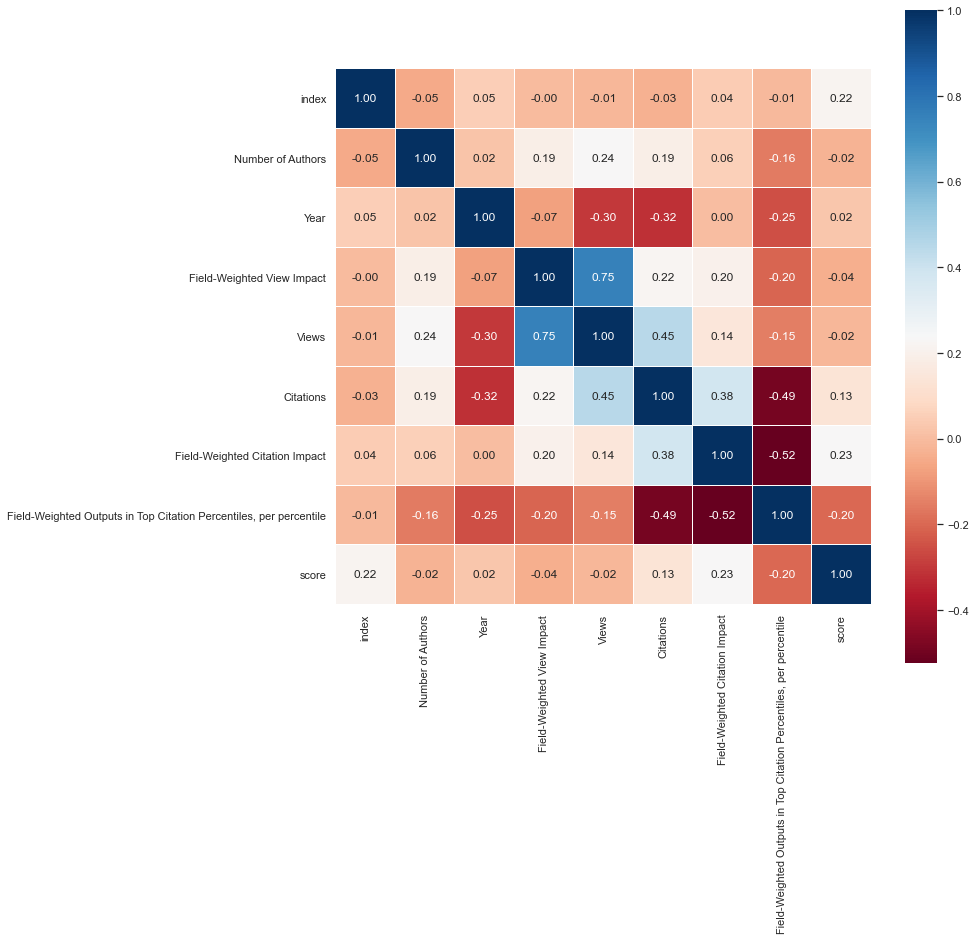

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(new_data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

In [23]:
X=new_data_oh.drop(["score", 'index'], axis = 1) 
y=new_data_oh["score"]
print(X.shape, y.shape )

(6851, 26) (6851,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
print(X_train, X_test, y_train, y_test)


#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_test=scaler.fit_transform(X_test)
X_train=scaler.fit_transform(X_train)

      Number of Authors  Field-Weighted View Impact  Views  Citations  \
892                   8                        1.73     25         11   
1715                  3                        0.27     11          0   
1003                  8                        0.48     15          6   
957                   3                        0.40      9          7   
6459                  4                        0.84     10          9   
...                 ...                         ...    ...        ...   
1317                  3                        0.39     12          2   
2283                 13                        2.69     51          6   
2004                  3                        0.55     10          0   
3668                  7                        1.15     13          5   
607                   3                        1.25      9          0   

      Field-Weighted Citation Impact  \
892                             2.25   
1715                            0.00   
100

In [25]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [26]:
lr.coef_

array([-1.02257239e-01, -3.25333391e-01,  1.23546007e-01,  1.03736036e-01,
        5.63662085e-01, -3.87892757e-02, -6.10146962e-02,  8.27603367e-02,
       -9.71445147e-17, -1.68751512e-03,  4.38671969e-02,  1.84804437e-02,
       -2.73332532e-02,  1.22979085e-02, -5.78971274e-02, -2.27589845e-02,
        6.47266936e-03, -3.70215657e-02, -2.61265869e-02,  9.17068144e-02,
       -5.12649433e-04,  2.16980692e-04, -4.37155873e-03, -4.64039893e-03,
        2.26493660e-03,  7.04268980e-03])

In [27]:
lr.intercept_

0.050621101893611936

In [28]:
lr.score(X_test, y_test) # Р-квадрат


0.07485143440840458

In [29]:
from sklearn.metrics import mean_absolute_error as MAE
y_pred_LR_train = lr.predict(X_train)
print(MAE(y_train, y_pred_LR_train))

print(MAE(y_test, y_pred))


0.06765729304207481
0.07172915021533173


In [30]:
print(X_test.shape, y_test.shape)

(1371, 26) (1371,)


(array([ 16., 789., 510.,  43.,   7.,   3.,   1.,   0.,   0.,   2.]),
 array([-0.07201273, -0.00386439,  0.06428396,  0.1324323 ,  0.20058064,
         0.26872898,  0.33687733,  0.40502567,  0.47317401,  0.54132236,
         0.6094707 ]),
 <a list of 10 Patch objects>)

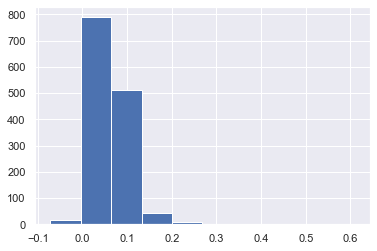

In [31]:
plt.hist(y_pred)

# Множественная полиномиальная регрессия (полином 4 степени)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Fitting Polynomial Regression to the dataset Полином 4 степени
from sklearn.preprocessing import PolynomialFeatures
poly_reg4 = PolynomialFeatures(degree=4)
X_poly4 = poly_reg4.fit_transform(X)

pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly4, y)

LinearRegression()

In [33]:
X_poly_test4=poly_reg4.fit_transform(X_test)
X_poly_test4.shape

(1371, 27405)

In [34]:
from sklearn.metrics import mean_squared_error as MSE


In [35]:
pol_reg4.score(X_poly_test4, y_test)

-233635.31318119104

In [36]:
y_pred_poly4=pol_reg4.predict(X_poly_test4)
print (MAE(y_test, y_pred_poly4))

26.320284733694116


(array([1142.,    0.,    0.,    2.,  168.,    2.,    3.,    0.,    8.,
          46.]),
 array([ -8.67036548,  14.72621408,  38.12279365,  61.51937321,
         84.91595278, 108.31253234, 131.70911191, 155.10569147,
        178.50227104, 201.8988506 , 225.29543017]),
 <a list of 10 Patch objects>)

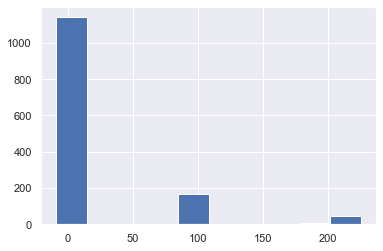

In [37]:
plt.hist(y_pred_poly4)

# Множественная полиномиальная регрессия (полином 3 степени)

In [38]:
poly_reg3 = PolynomialFeatures(degree=3)
X_poly3 = poly_reg3.fit_transform(X)
pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly3, y)

LinearRegression()

In [39]:
X_poly_test3=poly_reg3.fit_transform(X_test)
X_poly_test3.shape
pol_reg3.score(X_poly_test3, y_test)

-116.27839155855361

In [40]:
y_pred_poly3=pol_reg3.predict(X_poly_test3)
MAE(y_test, y_pred_poly3)

1.1398288881122776

(array([164.,  58.,   4.,   3., 191., 159., 403., 204., 126.,  59.]),
 array([-2.25305871, -2.04371097, -1.83436323, -1.62501548, -1.41566774,
        -1.20632   , -0.99697225, -0.78762451, -0.57827677, -0.36892902,
        -0.15958128]),
 <a list of 10 Patch objects>)

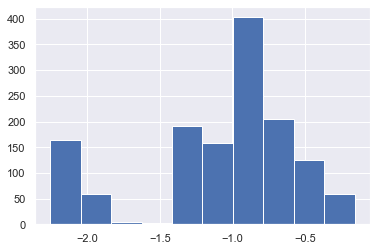

In [41]:
plt.hist(y_pred_poly3)

# Множественная полиномиальная регрессия (полином 2 степени)

In [42]:
poly_reg2 = PolynomialFeatures(degree=2)
X_poly2 = poly_reg2.fit_transform(X)
pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly2, y)

LinearRegression()

In [43]:
X_poly_test2=poly_reg2.fit_transform(X_test)
X_poly_test2.shape
pol_reg2.score(X_poly_test2, y_test)

-0.5325820836061954

In [44]:
y_pred_poly2=pol_reg2.predict(X_poly_test2)
MAE(y_test, y_pred_poly2)

0.126815781705726

(array([ 60., 390., 443., 260., 164.,  46.,   6.,   0.,   0.,   2.]),
 array([0.03992452, 0.07575112, 0.11157773, 0.14740433, 0.18323094,
        0.21905754, 0.25488415, 0.29071075, 0.32653736, 0.36236396,
        0.39819057]),
 <a list of 10 Patch objects>)

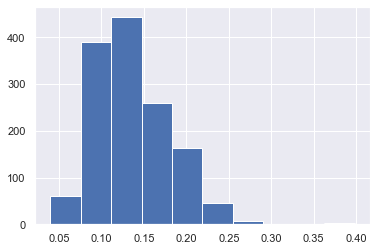

In [45]:
plt.hist(y_pred_poly2)

In [46]:
print(X_poly4.shape)
print(X_poly3.shape)
print(X_poly2.shape)


(6851, 27405)
(6851, 3654)
(6851, 378)


# Бэггинг

In [57]:
#Бэггинг
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
clf_BR = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred_BR = clf_BR.predict(X_test)

print(MAE(y_test, y_pred_BR))
y_pred_BR_train = clf_BR.predict(X_train)
print(MAE(y_train, y_pred_BR_train))

0.08608292437121495
0.08732212780984915


In [54]:
#Бэггинг
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
clf_BR = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred_BR = clf_BR.predict(X_test)

print(MAE(y_test, y_pred_BR))
y_pred_BR_train = clf_BR.predict(X_train)
print(MAE(y_train, y_pred_BR_train))


0.08608292437121495
0.08732212780984915


# Случайный лес

In [47]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, max_depth=5)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)


In [48]:
print (MAE(y_test, y_pred_rf))


y_pred_RF_train = rnd_clf.predict(X_train)
print(MAE(y_train, y_pred_RF_train))


0.039220800283583185
0.038032163757532975


In [49]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())


Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [50]:
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Подбор значений для случайного леса

In [51]:
import time
start = time.time()
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth=5
max_depth = [int(x) for x in np.linspace(1, 15, num = 1)]
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10, 30]
#n_estimators=[30, 50, 100, 150, 200, 250]
#n_estimators=[30, 50, 100]

bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rsv=RandomizedSearchCV(    estimator=RandomForestRegressor(random_state=42),
    param_distributions=random_grid,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    iid='deprecated',
    refit=True,
    cv=10,
    verbose=0,
    pre_dispatch='2*n_jobs',
    random_state=42,
    return_train_score=False,)
rsv.fit(X_train, y_train)
y_pred_rsv = rsv.predict(X_test)
print(MAE(y_test, y_pred_rsv))
y_pred_rsv_train = rsv.predict(X_train)
print(MAE(y_train, y_pred_rsv_train))
end = time.time()
print(end - start)
print(random_grid)

0.03442255119922799
0.01797415112299054
127.33807921409607
{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 10, 30], 'bootstrap': [True, False]}


In [52]:
rsv.best_params_


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

# Дерево решений

In [53]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor
clf_DTC = DecisionTreeRegressor(max_depth=4, random_state=42)
clf_DTC.fit(X_train, y_train)
y_pred_DTC = clf_DTC.predict(X_test)

print(MAE(y_test, y_pred_DTC))
y_pred_DTC_train = clf_DTC.predict(X_train)
print(MAE(y_train, y_pred_DTC_train))


0.040257803680057394
0.03925751602398934


(array([  3.,  31., 392., 903.,  16.,  21.,   3.,   1.,   0.,   1.]),
 array([-0.15736801, -0.07932651, -0.00128501,  0.07675648,  0.15479798,
         0.23283948,  0.31088097,  0.38892247,  0.46696397,  0.54500546,
         0.62304696]),
 <a list of 10 Patch objects>)

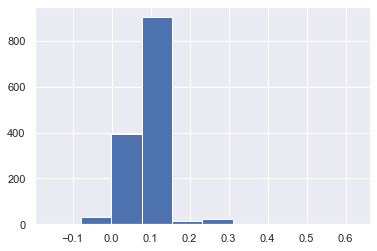

In [55]:
plt.hist(y_pred_BR)

In [56]:
%%time
#Бэггинг
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
clf_BR = BaggingRegressor(base_estimator=SVR(),n_estimators=15, random_state=0).fit(X_train, y_train)
y_pred_BR = clf_BR.predict(X_test)

print(MAE(y_test, y_pred_BR))
y_pred_BR_train = clf_BR.predict(X_train)
print(MAE(y_train, y_pred_BR_train))

0.0859655381687209
0.08706016317551277
Wall time: 4.67 s


In [58]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor
clf_DTC = DecisionTreeRegressor(max_depth=2, random_state=42)
clf_DTC.fit(X_train, y_train)
y_pred_DTC = clf_DTC.predict(X_test)

print(MAE(y_test, y_pred_DTC))
y_pred_DTC_train = clf_DTC.predict(X_train)
print(MAE(y_train, y_pred_DTC_train))


0.05158725481372471
0.05198233773918354


In [59]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor
clf_DTC = DecisionTreeRegressor(max_depth=5, random_state=42)
clf_DTC.fit(X_train, y_train)
y_pred_DTC = clf_DTC.predict(X_test)

print(MAE(y_test, y_pred_DTC))
y_pred_DTC_train = clf_DTC.predict(X_train)
print(MAE(y_train, y_pred_DTC_train))

0.03722918543332531
0.0366101110967241


In [60]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor
clf_DTC = DecisionTreeRegressor(max_depth=15, random_state=42)
clf_DTC.fit(X_train, y_train)
y_pred_DTC = clf_DTC.predict(X_test)

print(MAE(y_test, y_pred_DTC))
y_pred_DTC_train = clf_DTC.predict(X_train)
print(MAE(y_train, y_pred_DTC_train))

0.03812881586796221
0.009617253998620817


In [61]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor
clf_DTC = DecisionTreeRegressor(max_depth=4, random_state=42, criterion='mae', splitter='best', max_features='auto')
clf_DTC.fit(X_train, y_train)
y_pred_DTC = clf_DTC.predict(X_test)

y_pred_DTC_train = clf_DTC.predict(X_train)
print('Средний модуль отклонения на обучающей выборке', MAE(y_train, y_pred_DTC_train))

print('Средний модуль отклонения на тренинговой выборке', MAE(y_test, y_pred_DTC))
print('Минимальное предсказанное значение :', y_pred_DTC_train.min(), '\n' , 'Среднее предсказанное значение :', y_pred_DTC_train.mean(), '\n' , 'Максимальное предсказанное значение : ', y_pred_DTC_train.max())

Средний модуль отклонения на обучающей выборке 0.0396213548470803
Средний модуль отклонения на тренинговой выборке 0.03949774722319475
Минимальное предсказанное значение : 0.0 
 Среднее предсказанное значение : 0.04747407708631387 
 Максимальное предсказанное значение :  0.633075267
